In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing data**


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yf
#list of ETF
tickers= "RELIANCE.NS GAIL.NS BHARTIARTL.NS APOLLOHOSP.NS TATAMOTORS.NS"
df_5tickerclosing = yf.download(tickers, start="2009-01-01", end="2022-12-31")['Adj Close']
df_5tickerclosing.reset_index(inplace=True)
df_5tickerclosing["Date"]=df_5tickerclosing.Date.dt.date


[*********************100%***********************]  5 of 5 completed


In [4]:
df_5tickerclosing

,Date,APOLLOHOSP.NS,BHARTIARTL.NS,GAIL.NS,RELIANCE.NS,TATAMOTORS.NS
0,2009-01-02,222.669724,303.357086,26.028721,287.016144,32.157669
1,2009-01-05,217.409973,295.072784,26.830950,304.742676,32.596054
2,2009-01-06,215.324646,282.743042,26.436100,305.869446,34.057358
3,2009-01-07,212.196579,279.730591,24.900574,267.906281,31.810602
4,2009-01-09,202.719818,274.953644,25.389431,257.308228,30.276251
...,...,...,...,...,...,...
3405,2022-10-25,4404.049805,802.299988,86.550003,2441.550049,404.549988
3406,2022-10-27,4431.850098,817.099976,88.050003,2451.149902,407.700012
3407,2022-10-28,4567.000000,816.849976,90.050003,2526.149902,409.899994
3408,2022-10-31,4517.500000,832.000000,91.300003,2549.600098,412.750000


In [5]:
df_5tickerclosing.columns=['Date','APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS']

In [6]:
df_5tickerclosing['portfolio']=df_5tickerclosing[['APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS']].mean(axis=1)

***Descriptive Data Analysis***

Close price

In [7]:
import pandas as pd
df_des=pd.DataFrame()

In [8]:
#meanf
df_des['mean']=df_5tickerclosing.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
#standard deviation
df_des['std']=df_5tickerclosing.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [10]:
#coefficient of variance
df_des['covar']=df_5tickerclosing.std()/df_5tickerclosing.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [11]:
df_des.round(2)

,mean,std,covar
APOLLOHOSP,1363.42,1159.60,0.85
BHARTIARTL,370.59,132.95,0.36
GAIL,65.60,19.40,0.30
RELIANCE,900.66,701.13,0.78
TATAMOTORS,294.63,140.23,0.48
portfolio,598.98,397.59,0.66


In [12]:
for symbol in ['APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS','portfolio']:
  df_5tickerclosing["previous_{}".format(symbol)] = df_5tickerclosing[symbol].shift(1)
  df_5tickerclosing['return_{}'.format(symbol)] = (df_5tickerclosing[symbol] / df_5tickerclosing["previous_{}".format(symbol)] ) - 1
  df_5tickerclosing['per_return_{}'.format(symbol) ] = df_5tickerclosing['return_{}'.format(symbol)] * 100
  del df_5tickerclosing['return_{}'.format(symbol)]
  del df_5tickerclosing["previous_{}".format(symbol)]
  df_5tickerclosing.head()

In [13]:
df_5tickerclosing[[x  for x in list(df_5tickerclosing.columns) if (x.split('_')[-1]!='Date') & ( x.split('_')[0]!='previous')]]

,APOLLOHOSP,BHARTIARTL,GAIL,RELIANCE,TATAMOTORS,portfolio,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS,per_return_portfolio
0,222.669724,303.357086,26.028721,287.016144,32.157669,174.245869,NaN,NaN,NaN,NaN,NaN,NaN
1,217.409973,295.072784,26.830950,304.742676,32.596054,175.330487,-2.362131,-2.730875,3.082091,6.176145,1.363236,0.622465
2,215.324646,282.743042,26.436100,305.869446,34.057358,172.886118,-0.959168,-4.178543,-1.471621,0.369745,4.483069,-1.394150
3,212.196579,279.730591,24.900574,267.906281,31.810602,163.308925,-1.452721,-1.065438,-5.808445,-12.411559,-6.596976,-5.539596
4,202.719818,274.953644,25.389431,257.308228,30.276251,158.129474,-4.466029,-1.707696,1.963237,-3.955881,-4.823396,-3.171566
...,...,...,...,...,...,...,...,...,...,...,...,...
3405,4404.049805,802.299988,86.550003,2441.550049,404.549988,1627.799966,-0.138320,0.024936,-0.288018,-1.544450,0.734557,-0.507306
3406,4431.850098,817.099976,88.050003,2451.149902,407.700012,1639.169998,0.631244,1.844695,1.733102,0.393187,0.778649,0.698491
3407,4567.000000,816.849976,90.050003,2526.149902,409.899994,1681.989975,3.049514,-0.030596,2.271437,3.059788,0.539608,2.612296
3408,4517.500000,832.000000,91.300003,2549.600098,412.750000,1680.630020,-1.083862,1.854689,1.388118,0.928298,0.695293,-0.080854


In [14]:
import numpy as np
import pandas as pd

import plotnine

from plotnine import *
from plotnine import data
from pandas import DataFrame

Return 

In [15]:
df_5tickerclosing

,Date,APOLLOHOSP,BHARTIARTL,GAIL,RELIANCE,TATAMOTORS,portfolio,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS,per_return_portfolio
0,2009-01-02,222.669724,303.357086,26.028721,287.016144,32.157669,174.245869,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,217.409973,295.072784,26.830950,304.742676,32.596054,175.330487,-2.362131,-2.730875,3.082091,6.176145,1.363236,0.622465
2,2009-01-06,215.324646,282.743042,26.436100,305.869446,34.057358,172.886118,-0.959168,-4.178543,-1.471621,0.369745,4.483069,-1.394150
3,2009-01-07,212.196579,279.730591,24.900574,267.906281,31.810602,163.308925,-1.452721,-1.065438,-5.808445,-12.411559,-6.596976,-5.539596
4,2009-01-09,202.719818,274.953644,25.389431,257.308228,30.276251,158.129474,-4.466029,-1.707696,1.963237,-3.955881,-4.823396,-3.171566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,2022-10-25,4404.049805,802.299988,86.550003,2441.550049,404.549988,1627.799966,-0.138320,0.024936,-0.288018,-1.544450,0.734557,-0.507306
3406,2022-10-27,4431.850098,817.099976,88.050003,2451.149902,407.700012,1639.169998,0.631244,1.844695,1.733102,0.393187,0.778649,0.698491
3407,2022-10-28,4567.000000,816.849976,90.050003,2526.149902,409.899994,1681.989975,3.049514,-0.030596,2.271437,3.059788,0.539608,2.612296
3408,2022-10-31,4517.500000,832.000000,91.300003,2549.600098,412.750000,1680.630020,-1.083862,1.854689,1.388118,0.928298,0.695293,-0.080854


In [16]:
return_df_5tickerclosing=df_5tickerclosing[[x  for x in list(df_5tickerclosing.columns) if ('return' in x.split('_') )]].dropna()

In [17]:

return_df_5tickerclosing

,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS,per_return_portfolio
1,-2.362131,-2.730875,3.082091,6.176145,1.363236,0.622465
2,-0.959168,-4.178543,-1.471621,0.369745,4.483069,-1.394150
3,-1.452721,-1.065438,-5.808445,-12.411559,-6.596976,-5.539596
4,-4.466029,-1.707696,1.963237,-3.955881,-4.823396,-3.171566
5,2.948911,-2.355588,1.777345,-4.799462,-2.564127,-1.666131
...,...,...,...,...,...,...
3405,-0.138320,0.024936,-0.288018,-1.544450,0.734557,-0.507306
3406,0.631244,1.844695,1.733102,0.393187,0.778649,0.698491
3407,3.049514,-0.030596,2.271437,3.059788,0.539608,2.612296
3408,-1.083862,1.854689,1.388118,0.928298,0.695293,-0.080854


In [18]:
return_df_5tickerclosing.join(df_5tickerclosing['Date'])

,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS,per_return_portfolio,Date
1,-2.362131,-2.730875,3.082091,6.176145,1.363236,0.622465,2009-01-05
2,-0.959168,-4.178543,-1.471621,0.369745,4.483069,-1.394150,2009-01-06
3,-1.452721,-1.065438,-5.808445,-12.411559,-6.596976,-5.539596,2009-01-07
4,-4.466029,-1.707696,1.963237,-3.955881,-4.823396,-3.171566,2009-01-09
5,2.948911,-2.355588,1.777345,-4.799462,-2.564127,-1.666131,2009-01-12
...,...,...,...,...,...,...,...
3405,-0.138320,0.024936,-0.288018,-1.544450,0.734557,-0.507306,2022-10-25
3406,0.631244,1.844695,1.733102,0.393187,0.778649,0.698491,2022-10-27
3407,3.049514,-0.030596,2.271437,3.059788,0.539608,2.612296,2022-10-28
3408,-1.083862,1.854689,1.388118,0.928298,0.695293,-0.080854,2022-10-31


In [19]:
df_des_return=pd.DataFrame()
df_des_return['mean']=pd.DataFrame(return_df_5tickerclosing.mean())

In [20]:
df_des_return['std']=pd.DataFrame(return_df_5tickerclosing.std())

In [21]:
df_des_return['covar']=pd.DataFrame(return_df_5tickerclosing.std()/return_df_5tickerclosing.mean())

In [22]:

df_des_return

,mean,std,covar
per_return_APOLLOHOSP,0.111609,2.166940,19.415457
per_return_BHARTIARTL,0.052289,2.133905,40.809930
per_return_GAIL,0.056619,1.990786,35.160844
per_return_RELIANCE,0.082133,1.917535,23.346704
per_return_TATAMOTORS,0.114778,2.814547,24.521753
per_return_portfolio,0.077520,1.490957,19.233083


In [23]:
import seaborn as sns

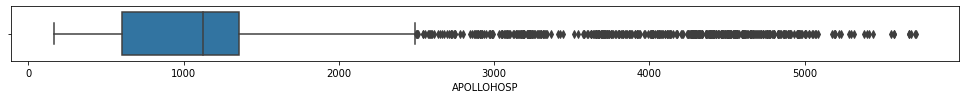

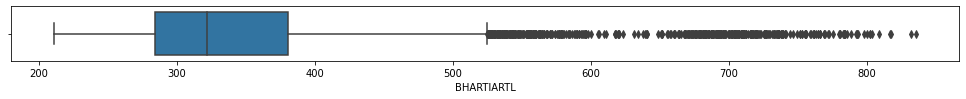

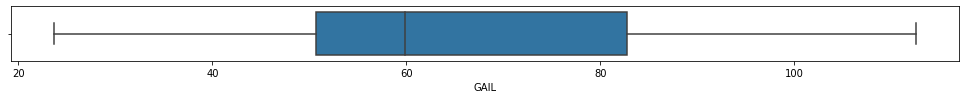

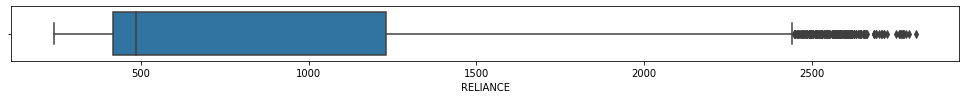

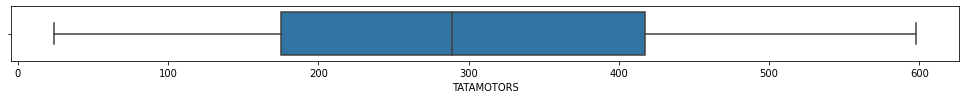

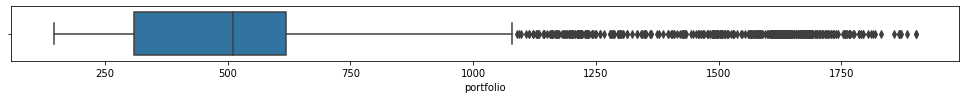

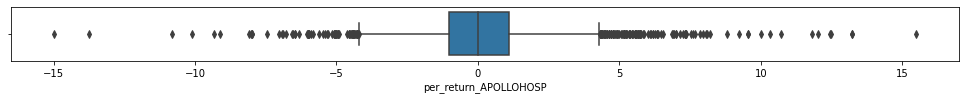

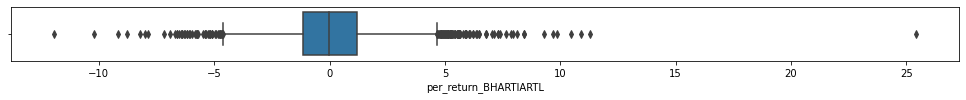

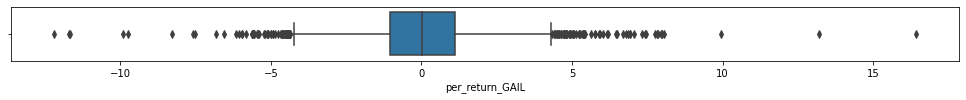

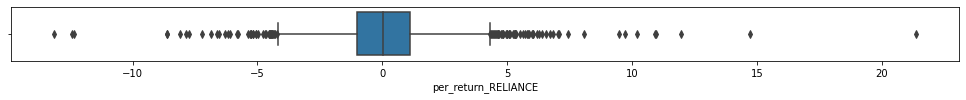

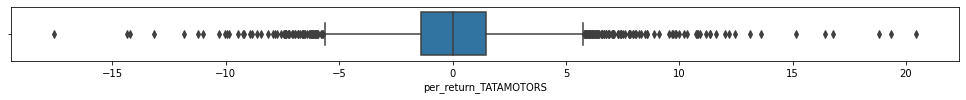

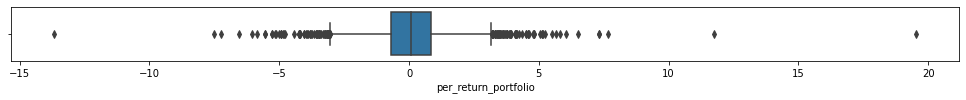

In [24]:
#df_5tickerclosing
import matplotlib.pyplot as plt
df1=df_5tickerclosing.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_5tickerclosing, x=column)

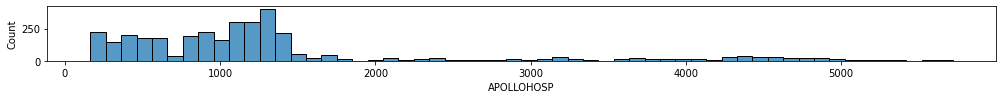

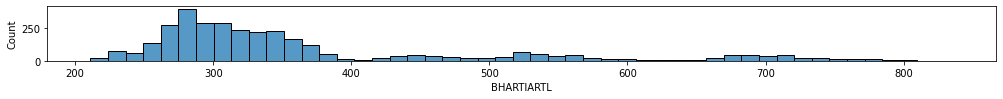

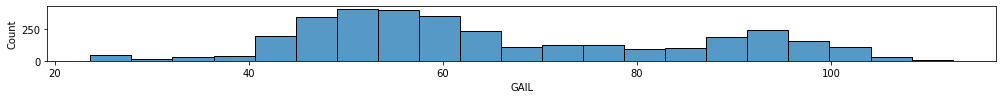

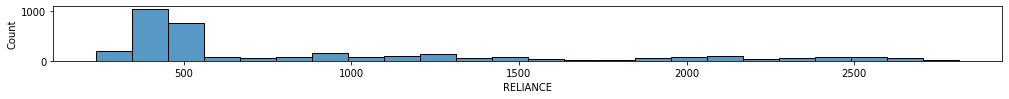

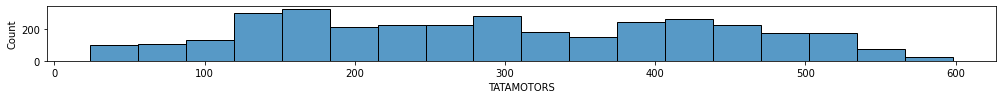

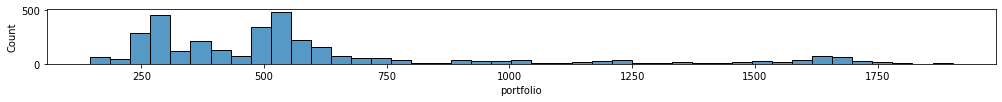

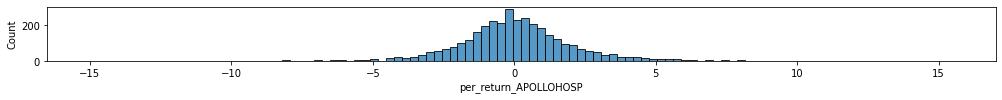

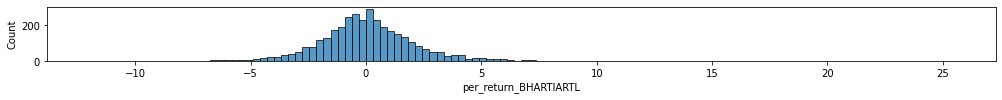

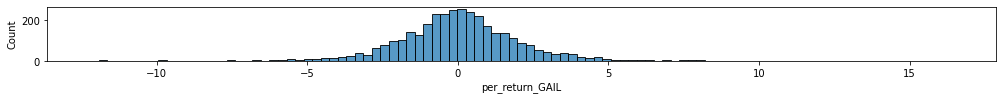

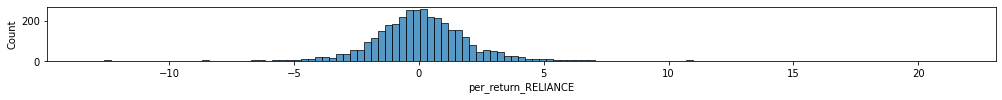

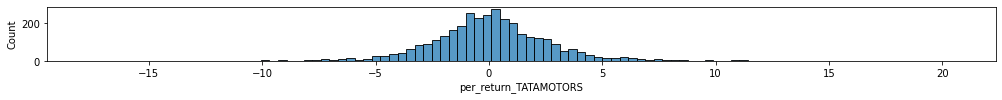

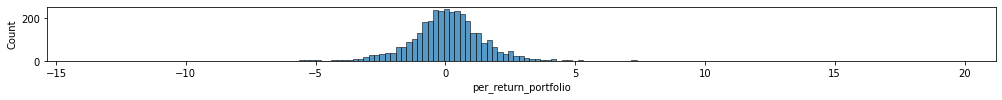

In [25]:
for column in df1:
  plt.figure(figsize=(17,1))
  sns.histplot(data=df_5tickerclosing, x=column)

Normal P plot

In [26]:
df_5tickerclosing.columns

Index(['Date', 'APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS',
       'portfolio', 'per_return_APOLLOHOSP', 'per_return_BHARTIARTL',
       'per_return_GAIL', 'per_return_RELIANCE', 'per_return_TATAMOTORS',
       'per_return_portfolio'],
      dtype='object')

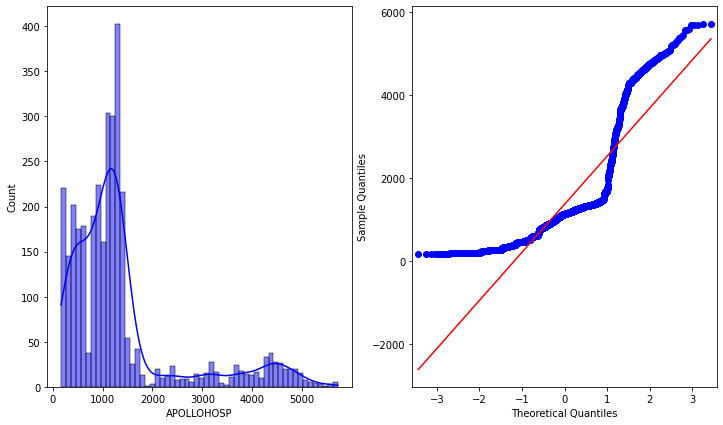

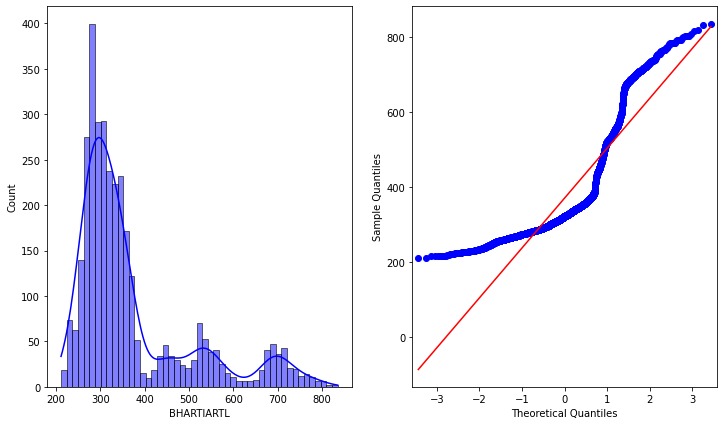

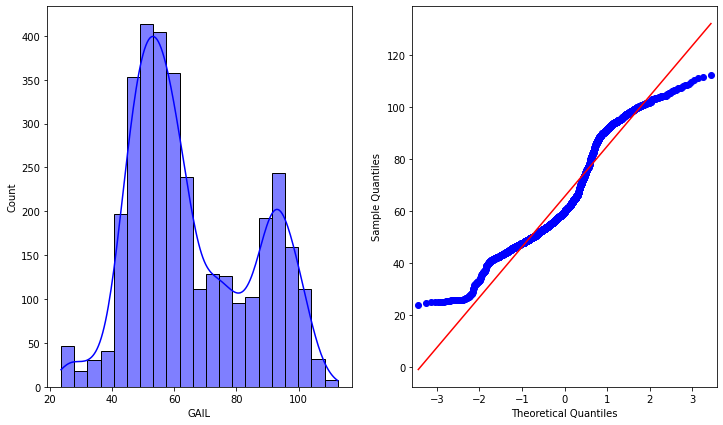

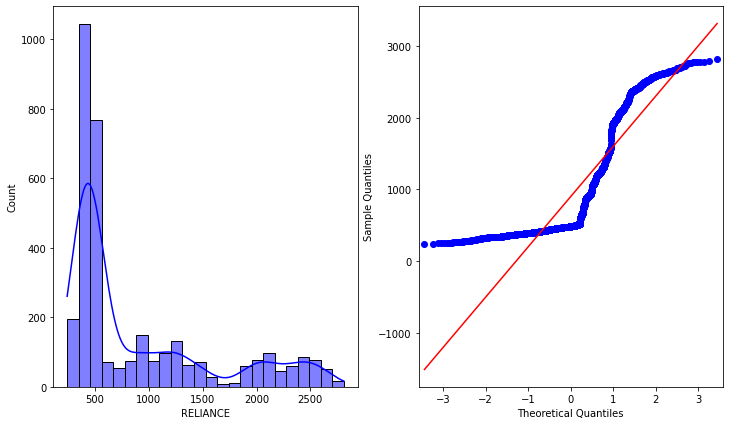

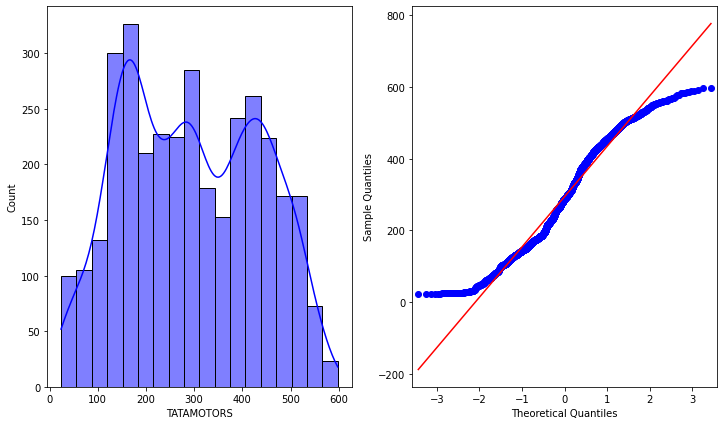

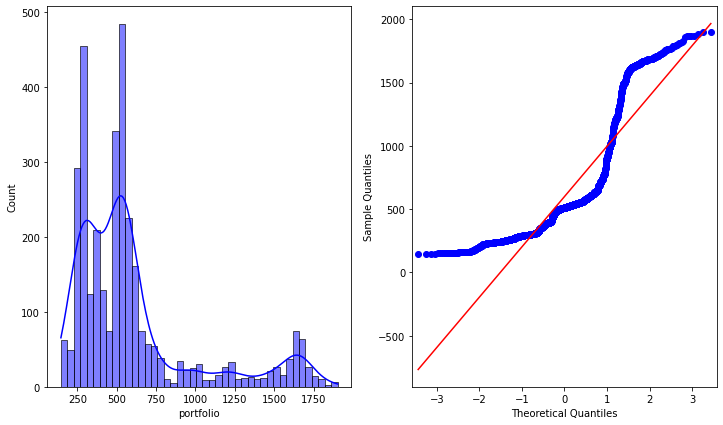

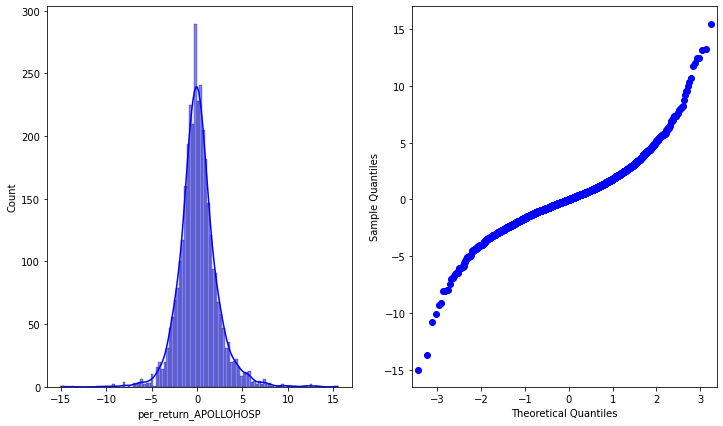

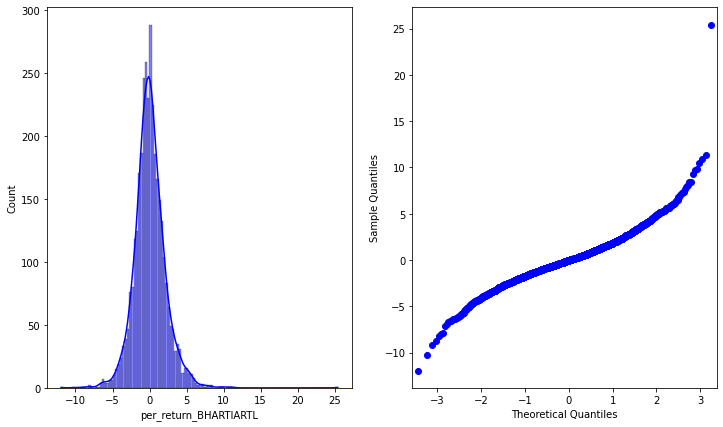

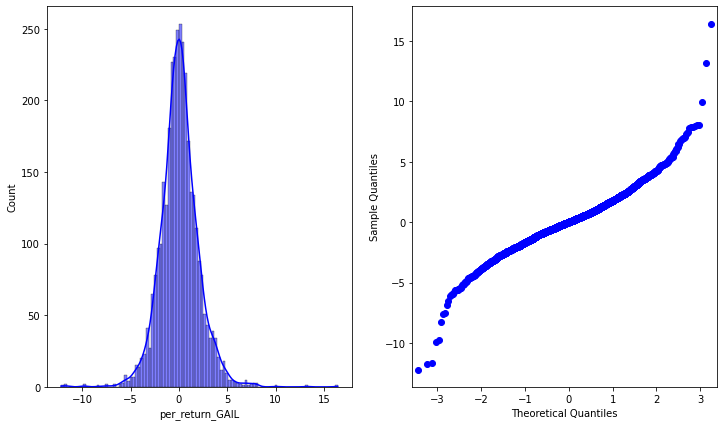

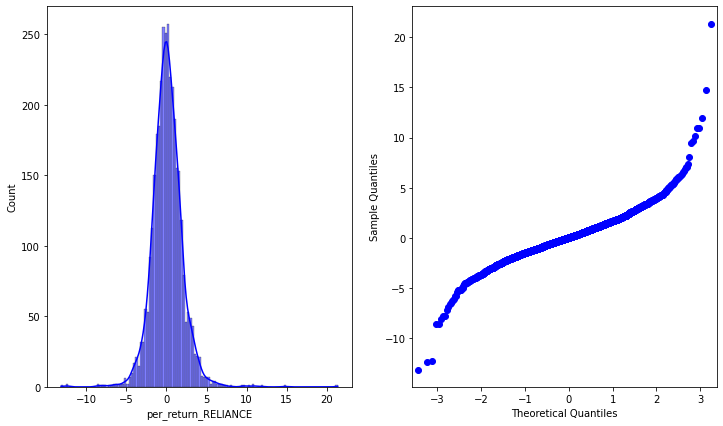

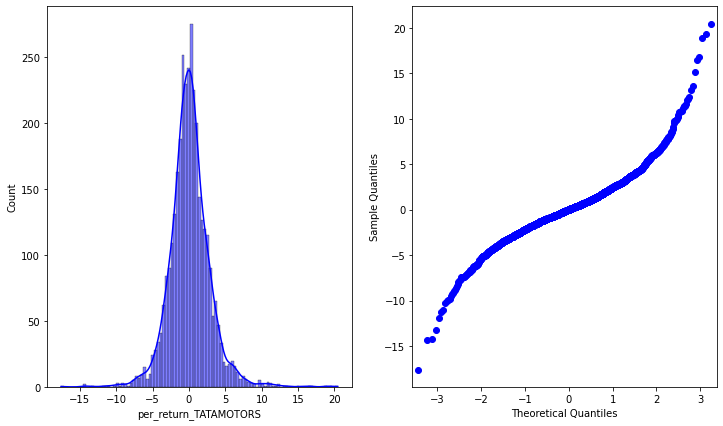

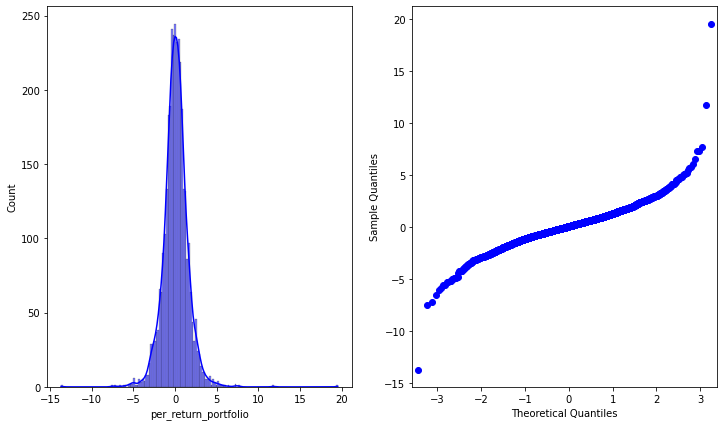

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
  

# plots for standard distribution
for col in list(df_5tickerclosing.columns):
  if col!='Date':
    fig, ax = plt.subplots(1, 2, figsize=(12, 7))
    sns.histplot(df_5tickerclosing[col],kde=True, color ='blue',ax=ax[0])
    sm.ProbPlot(df_5tickerclosing[col]).qqplot(line='s', ax=ax[1])
  


Moving Average

In [28]:
def bollinger_band(symbol, df,n,m):
  TP=df[['Date',symbol]].sort_values('Date').reset_index(drop=True)
  data=TP[symbol]
  #.dropna()
  B_MA=pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA_{}'.format(symbol))

  sigma=(data.rolling(n, min_periods=n).std())#.dropna())
  BU=pd.Series((B_MA+m*sigma), name='BU_{}'.format(symbol))
  BL=pd.Series((B_MA-m*sigma), name='BL_{}'.format(symbol))

  return_df=pd.concat([TP,B_MA,BU,BL],axis=1).dropna()
  return return_df
  #retun_df.columns=[symbol,]

In [29]:
return_df = return_df_5tickerclosing.join(df_5tickerclosing['Date'])


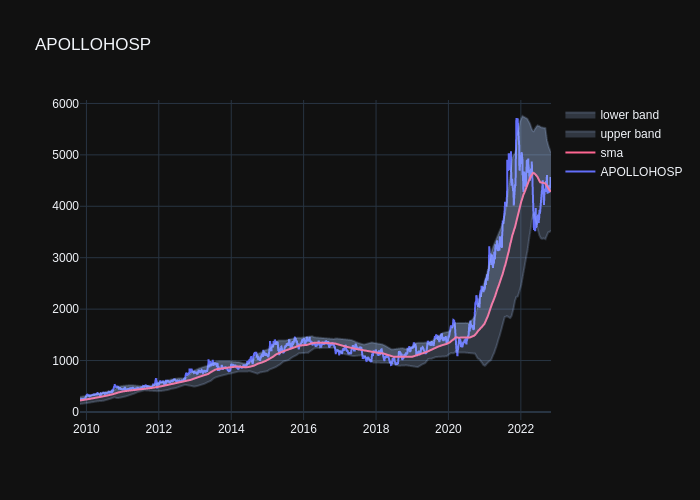

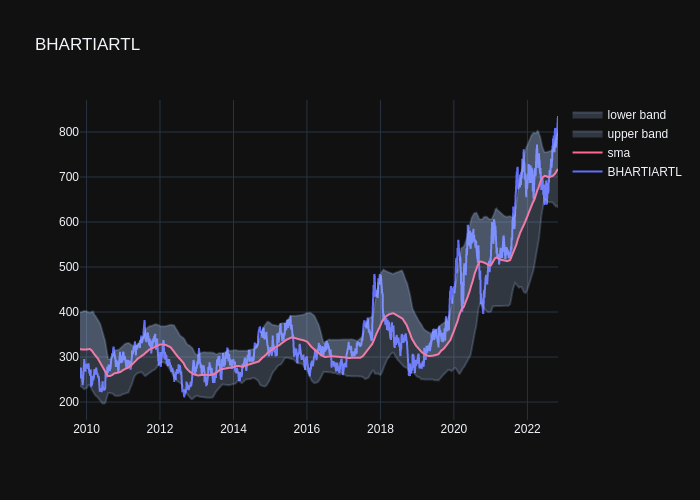

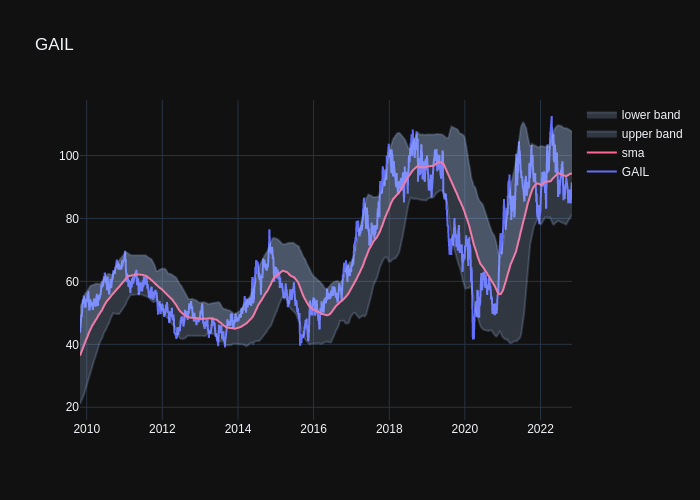

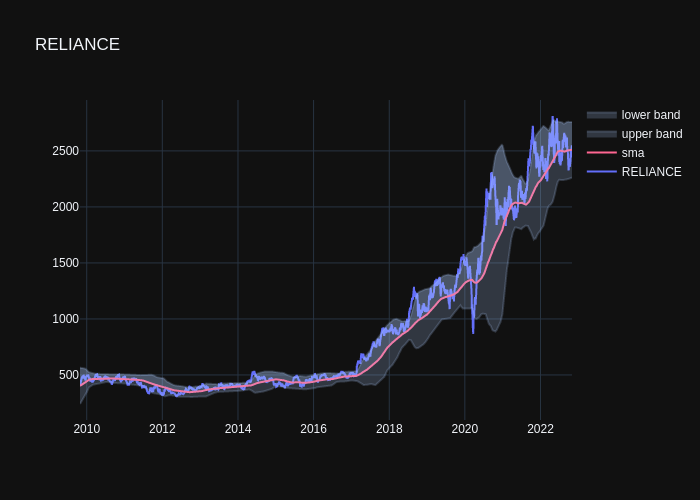

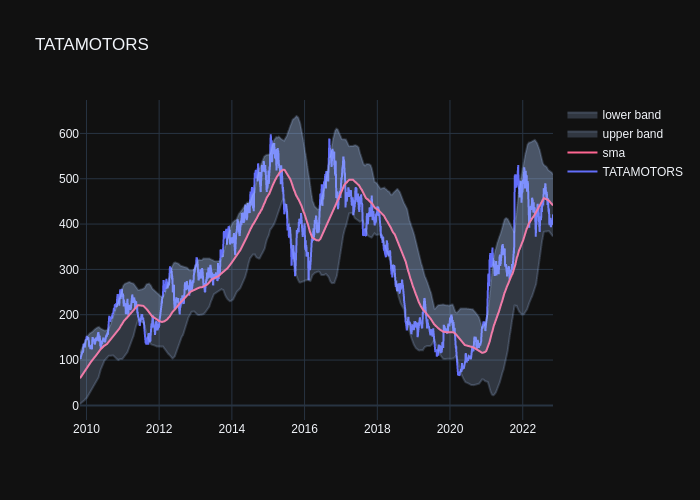

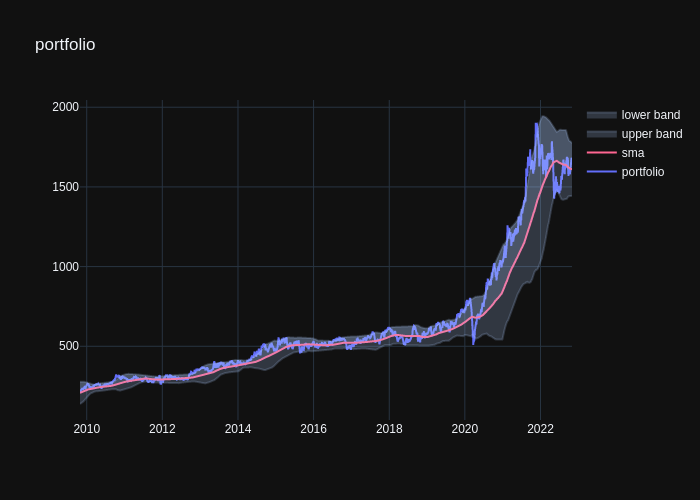

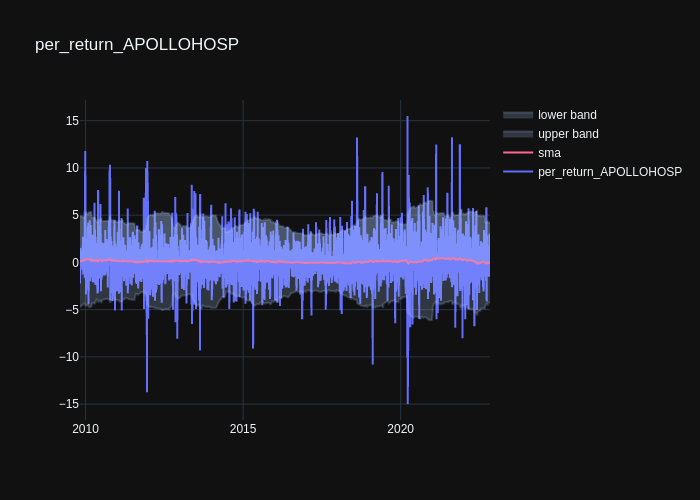

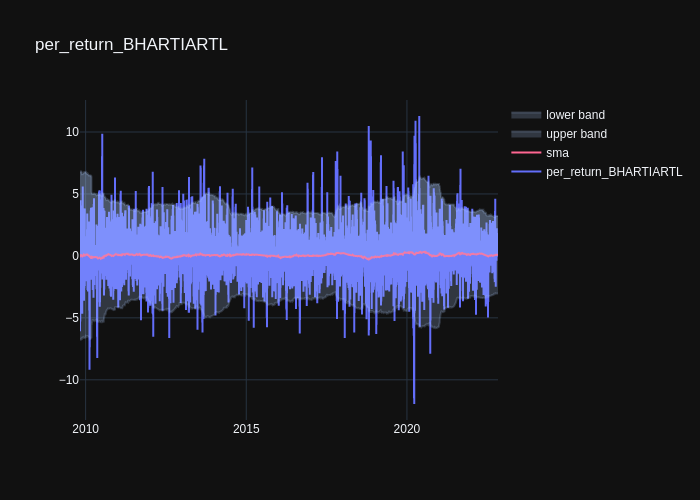

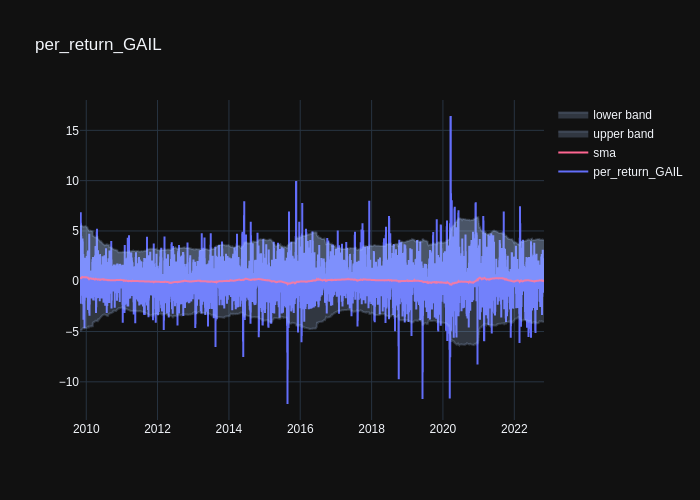

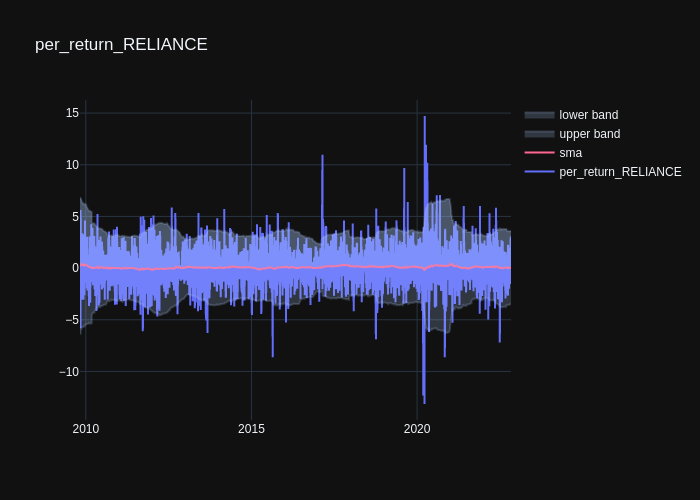

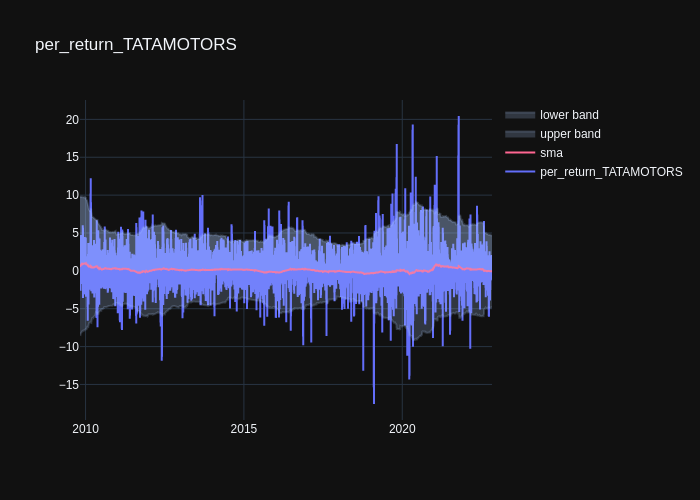

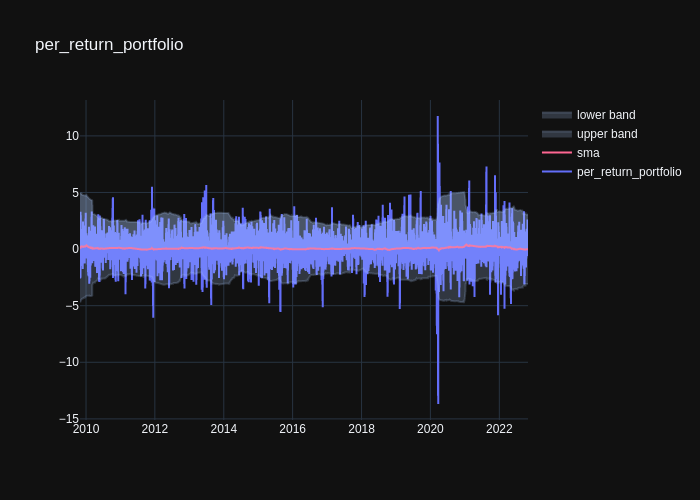

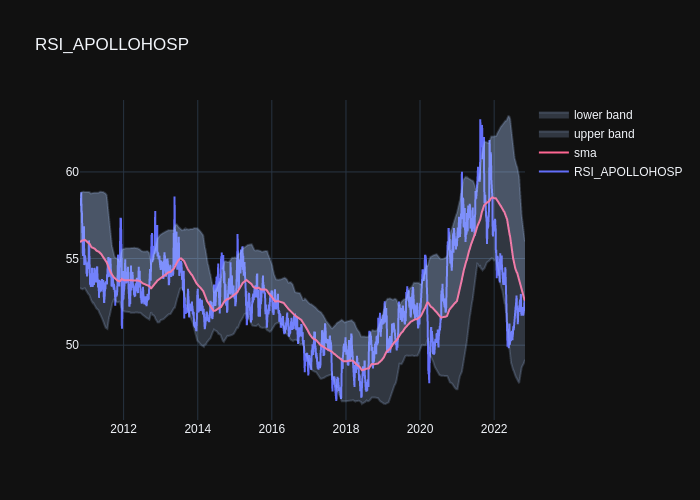

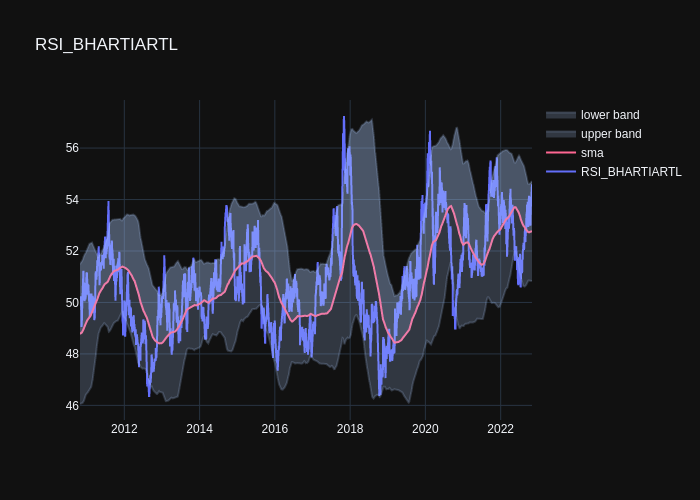

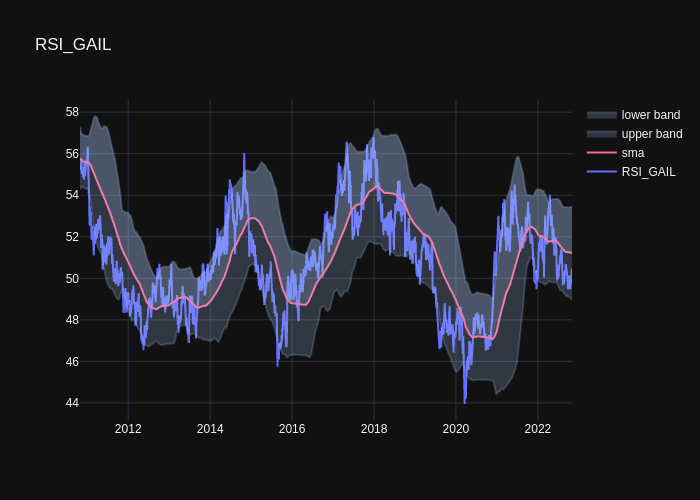

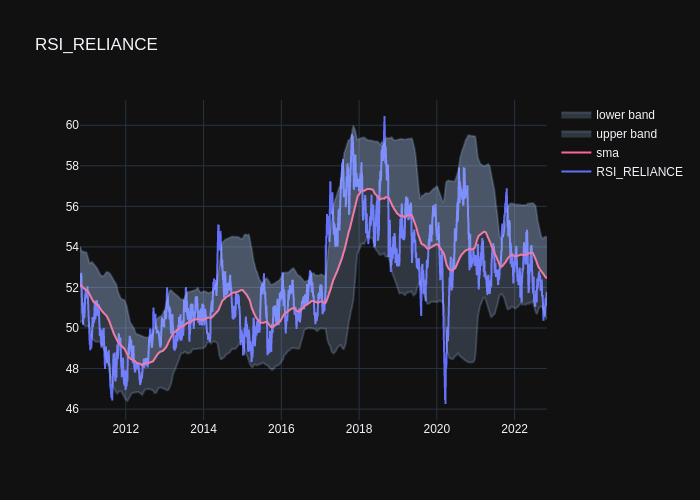

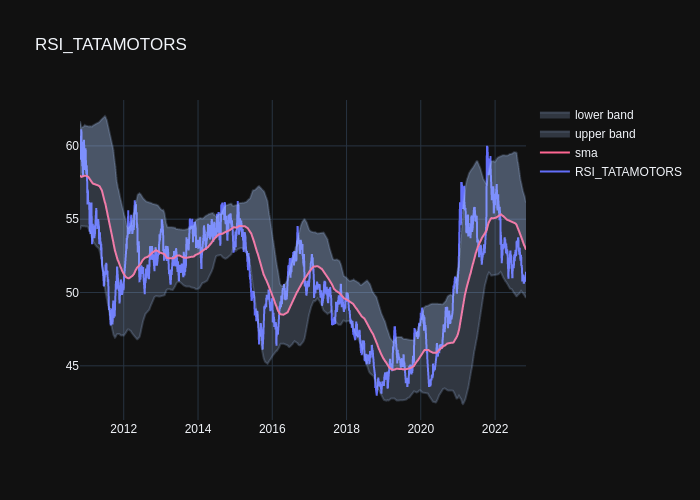

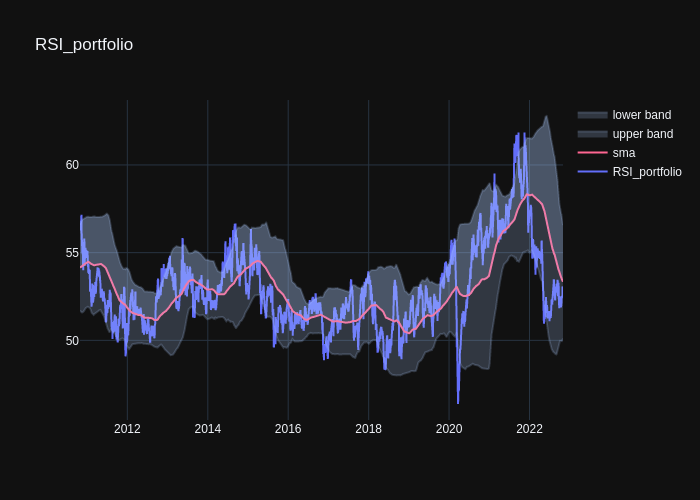

In [67]:
import plotly.io as pio
import plotly.graph_objects as go 

import matplotlib.pyplot as plt
n=200
m=2

pio.templates.default="plotly_dark"

for symbol in df_5tickerclosing.columns[1:]:
  bb=bollinger_band(symbol, df_5tickerclosing, n, m)
  

  fig=go.Figure()

  fig.update_layout(title=symbol)



  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb[symbol],
                          line_color = '#636EFA',
                          name = symbol)),


  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['B_MA_{}'.format(symbol)],
                          line_color = '#FF6692',
                          name = 'sma')),

  # Upper Bound
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['BU_{}'.format(symbol)],
                          line_color = 'rgba(173,204,255,0.2)',
                           fill = 'tonexty',
                           fillcolor='rgba(173,204,255,0.2)',
                          name = 'upper band',
                          opacity = 0.5)),

  # Lower Bound fill in between with parameter 'fill': 'tonexty'
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['BL_{}'.format(symbol)],
                          line_color = 'rgba(173,204,255,0.2)',
                            fill = 'tonexty',
                          fillcolor='rgba(173,204,255,0.2)',
                          name = 'lower band',
                          opacity = 0.5))
  
  fig.show('png')

Momentum Graph

In [31]:
def momentum(symbol, df,n):
  TP=df[['Date',symbol]].sort_values('Date').reset_index(drop=True)
  df_momentum= pd.concat([TP, TP[symbol].pct_change(n)],axis=1)
  df_momentum.columns=['Date',	'rtrn_{}'.format(symbol.split('_')[-1]),	'Mntm_rtrn_{}'.format(symbol.split('_')[-1])]
  return df_momentum

In [32]:
#df_des_mom=momentum('per_return_GAIL', return_df,14)

In [33]:
#df_des_mom.sort_values('Date',inplace=True)
#df_des_mom.replace([np.inf, - np.inf], np.nan, inplace = True)
#df_des_mom.sort_values('Mntm_rtrn_GAIL')

In [34]:
#df_des_mom.dropna()

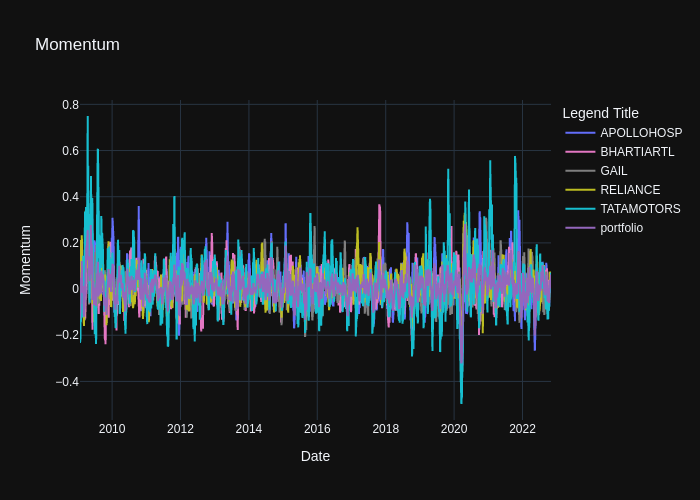

In [66]:
import plotly.io as pio
import plotly.graph_objects as go 

import matplotlib.pyplot as plt
n=200
m=2
color_list=['#636EFA','#e377c2','#7f7f7f','#bcbd22','#17becf','#9467bd','#bcbd22','#17becf' ]
pio.templates.default="plotly_dark"
fig=go.Figure()

fig.update_layout(title='Momentum')
df_5tickerclosing.sort_values('Date', inplace=True)
k=0
for symbol in [ 'APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS','portfolio']:
  bb=momentum(symbol, df_5tickerclosing,14)
  bb=bb.replace([np.inf, - np.inf], np.nan)
  bb.dropna(inplace=True)
  
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['Mntm_rtrn_{}'.format(symbol.split('_')[-1])],
                          line_color = color_list[k],
                          name = symbol))

  k=k+1

fig.update_layout(title='Momentum',
    xaxis_title="Date",
    yaxis_title="Momentum",
    legend_title="Legend Title")
fig.show('png')





Relative Strength Index

In [36]:
!pip install get_all_tickers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# Necessary Libraries
import yfinance as yf, pandas as pd, shutil, os, time, glob
import numpy as np
import requests
from get_all_tickers import get_tickers as gt
from statistics import mean

In [38]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

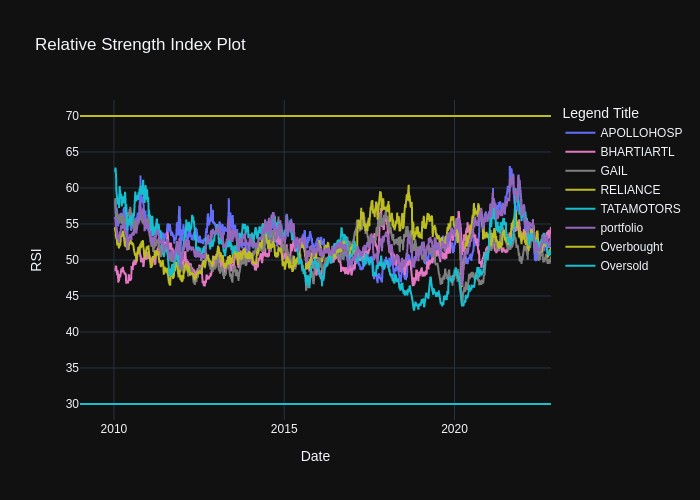

In [65]:
color_list=['#636EFA','#e377c2','#7f7f7f','#bcbd22','#17becf','#9467bd','#bcbd22','#17becf' ]
pio.templates.default="plotly_dark"
fig=go.Figure()

k=0
for symbol in ['APOLLOHOSP',	'BHARTIARTL',	'GAIL',	'RELIANCE',	'TATAMOTORS', 'portfolio']:
  if symbol !='Date':
    df_5tickerclosing['RSI_{}'.format(symbol)]=computeRSI(df_5tickerclosing[symbol], 250)
    fig.add_trace(go.Scatter(x = df_5tickerclosing['Date'],
                          y = df_5tickerclosing['RSI_{}'.format(symbol)],
                          line_color = color_list[k],
                        name = symbol) )
    k=k+1
fig.add_trace(go.Scatter(x = df_5tickerclosing['Date'],
                          y = pd.Series(df_5tickerclosing.shape[0]*[70]),
                          line_color = color_list[k],
                        name = 'Overbought') )
k=k+1
fig.add_trace(go.Scatter(  x = df_5tickerclosing['Date'],
                          y = pd.Series(df_5tickerclosing.shape[0]*[30]),
                        line_color = color_list[k],     
                        name = 'Oversold') )
fig.update_layout(title="Relative Strength Index Plot",
    xaxis_title="Date",
    yaxis_title="RSI",
    legend_title="Legend Title")

fig.show('png')




Sensitivity analysis using Beta Index

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
# symbols = [stock, market]
# start date for historical prices

def calulate_beta(symbol):
  data = yf.download([symbol,'^NSEI'], start="2009-01-01", end="2022-12-31")['Adj Close'] 
  # Convert historical stock prices to daily percent change
  price_change = data.pct_change()
  # Deletes row one containing the NaN
  df = price_change.drop(price_change.index[0])
  # Create arrays for x and y variables in the regression model 
  # Set up the model and define the type of regression
  x = np.array(df[symbol]).reshape((-1,1))
  y = np.array(df['^NSEI'])
  model = LinearRegression().fit(x, y)  
  print('Beta = ', model.coef_)
  return model.coef_

In [41]:
symbols = ['APOLLOHOSP.NS',	'BHARTIARTL.NS',	'GAIL.NS',	'RELIANCE.NS',	'TATAMOTORS.NS']

In [42]:
beta_list=[]
for symbol in symbols:
  print(symbol)
  beta=calulate_beta(symbol)
  beta_list.append(beta[0])


APOLLOHOSP.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.17735642]
BHARTIARTL.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.26850846]
GAIL.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.2754011]
RELIANCE.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.44467302]
TATAMOTORS.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.25645347]


In [43]:
beta_list

[0.17735642311118652,
 0.2685084594720287,
 0.2754011025859919,
 0.44467302189777114,
 0.256453467021729]

In [44]:
symbols = ['APOLLOHOSP',	'BHARTIARTL',	'GAIL',	'RELIANCE',	'TATAMOTORS']

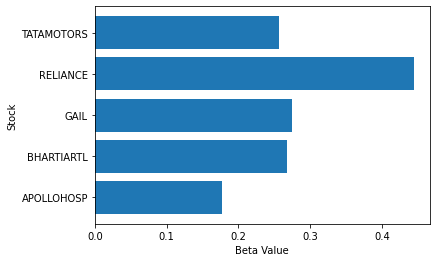

In [45]:
plt.barh( symbols, beta_list)
plt.xlabel("Beta Value")
plt.ylabel("Stock")
plt.show()

 **Stationary analysis**

Augmented dickey fuller test

In [46]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

In [47]:
df_5tickerclosing.columns


Index(['Date', 'APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS',
       'portfolio', 'per_return_APOLLOHOSP', 'per_return_BHARTIARTL',
       'per_return_GAIL', 'per_return_RELIANCE', 'per_return_TATAMOTORS',
       'per_return_portfolio', 'RSI_APOLLOHOSP', 'RSI_BHARTIARTL', 'RSI_GAIL',
       'RSI_RELIANCE', 'RSI_TATAMOTORS', 'RSI_portfolio'],
      dtype='object')

In [48]:
df1=pd.DataFrame()
for symbol in ['APOLLOHOSP',	'BHARTIARTL',	'GAIL',	'RELIANCE',	'TATAMOTORS', 'portfolio']:
  adf = st.adfuller(x=df_5tickerclosing['{}'.format(symbol)], regression="ct", maxlag=12)
  df1=pd.concat([df1,pd.DataFrame(adf)],axis=1)

In [49]:
df2=df1.T

In [50]:

df2['1%']=df2.apply(lambda x:x[4]['1%'],axis=1)
df2['10%']=df2.apply(lambda x:x[4]['10%'],axis=1)
df2['5%']=df2.apply(lambda x:x[4]['5%'],axis=1)

In [51]:

df2

,0,1,2,3,4,5,1%,10%,5%
0,-1.431095,0.851552,10,3399,"{'1%': -3.961435923874168, '5%': -3.4117824572...",34859.980257,-3.961436,-3.127811,-3.411782
0,-1.219759,0.906375,3,3406,"{'1%': -3.9614304398155307, '5%': -3.411779799...",23766.167072,-3.961430,-3.127809,-3.411780
0,-2.722004,0.22706,6,3403,"{'1%': -3.9614327873611863, '5%': -3.411780937...",11561.949901,-3.961433,-3.127810,-3.411781
0,-1.372043,0.868934,5,3404,"{'1%': -3.9614320043857805, '5%': -3.411780557...",30297.949644,-3.961432,-3.127810,-3.411781
0,-1.943059,0.632075,0,3409,"{'1%': -3.9614280964054807, '5%': -3.411778663...",23443.195229,-3.961428,-3.127809,-3.411779
0,-0.881793,0.958064,10,3399,"{'1%': -3.961435923874168, '5%': -3.4117824572...",25882.536875,-3.961436,-3.127811,-3.411782


In [52]:
df3=df2[[0,1,2,3,5,'1%','5%','10%']]

In [53]:

df3.columns=[
'ADF statistics', 
'P-value', 
'Used lag', 
'sample size',  
'icbest',
 '1%',	
 '5%',	
 '10%']

In [54]:
df3['symbol']=pd.Series(['APOLLOHOSP',	'BHARTIARTL',	'GAIL',	'RELIANCE',	'TATAMOTORS', 'portfolio'])

In [55]:

df3.reset_index(inplace=True)

In [56]:

del df3['index']

In [57]:
df3

,ADF statistics,P-value,Used lag,sample size,icbest,1%,5%,10%,symbol
0,-1.431095,0.851552,10,3399,34859.980257,-3.961436,-3.411782,-3.127811,APOLLOHOSP
1,-1.219759,0.906375,3,3406,23766.167072,-3.961430,-3.411780,-3.127809,APOLLOHOSP
2,-2.722004,0.22706,6,3403,11561.949901,-3.961433,-3.411781,-3.127810,APOLLOHOSP
3,-1.372043,0.868934,5,3404,30297.949644,-3.961432,-3.411781,-3.127810,APOLLOHOSP
4,-1.943059,0.632075,0,3409,23443.195229,-3.961428,-3.411779,-3.127809,APOLLOHOSP
5,-0.881793,0.958064,10,3399,25882.536875,-3.961436,-3.411782,-3.127811,APOLLOHOSP


In [58]:
return_df['per_return_portpolio']=return_df[['per_return_APOLLOHOSP',	'per_return_BHARTIARTL',	'per_return_GAIL',	'per_return_RELIANCE'	,'per_return_TATAMOTORS']].mean(axis=1)

Since the p value are less than 0.05. Hence we can reject the null hypothesis of Augumneted Dickey fuller test and conclude that out per_return is stationary. 

**Periodic Regime Shift analysis:**


In [59]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# nifty = pd.read_csv('nifty.csv', index_col=0, parse_dates=True #Get nifty prices
# nifty_ret = nifty.resample('W').last().pct_change().dropna() #Get weekly returns
# nifty_ret.plot(title='Excess returns', figsize=(12, 3)) #Plot the dataset

In [60]:

return_df.columns[:-1]

Index(['per_return_APOLLOHOSP', 'per_return_BHARTIARTL', 'per_return_GAIL',
       'per_return_RELIANCE', 'per_return_TATAMOTORS', 'per_return_portfolio',
       'Date'],
      dtype='object')

In [61]:

return_df2=return_df[['per_return_APOLLOHOSP',	
           'per_return_BHARTIARTL',	
           'per_return_GAIL',	
           'per_return_RELIANCE',	
           'per_return_TATAMOTORS',	'Date']]

In [62]:

return_df2['portfolio_return']=return_df2[return_df2.columns[::-1]].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:

return_df2['portfolio_return']

1       1.105693
2      -0.351303
3      -5.467028
4      -2.597953
5      -0.998584
          ...   
3405   -0.242259
3406    1.076175
3407    1.777950
3408    0.756507
3409    0.341806
Name: portfolio_return, Length: 3409, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                        Markov Switching Model Results                        
Dep. Variable:       portfolio_return   No. Observations:                 3409
Model:               MarkovRegression   Log Likelihood               -5702.153
Date:                Tue, 01 Nov 2022   AIC                          11422.307
Time:                        20:05:07   BIC                          11477.514
Sample:                             0   HQIC                         11442.036
                               - 3409                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.8424        nan        nan        nan         nan         nan
                             Regime 1 parameters    

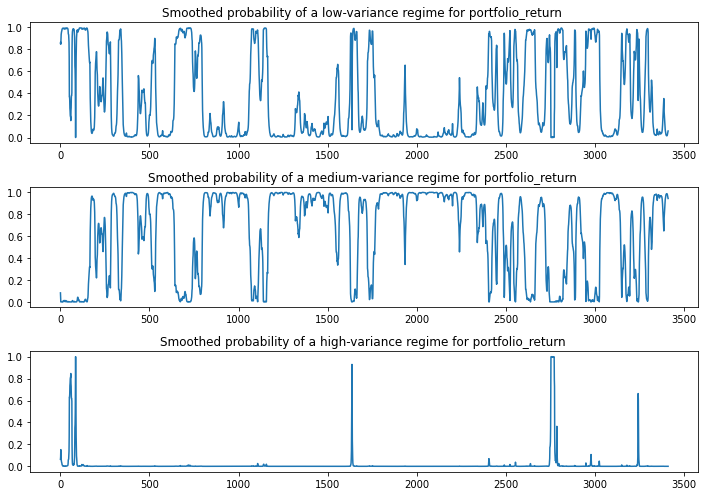

In [64]:
mod_kns = sm.tsa.MarkovRegression(return_df2['portfolio_return'].dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
print(res_kns.summary())
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for {} '.format('portfolio_return'))#
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for {} '.format('portfolio_return'))#
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for {} '.format('portfolio_return'))
fig.tight_layout()